In [2]:
#sintaxis
#while condicion:
#       instrucciones
n=0
while n<=10:
    print n
    n=n+1

0
1
2
3
4
5
6
7
8
9
10


In [3]:
#if  condicion:
#     instrucciones
#else:
#     instrucciones
a=5
b=2
if a<b:
    print "a es menor que b"
elif a==b: #No se recomienda con flotantes pues casi nunca –por no decir nunca– va a ser cierta.
           #elif es un "si no" y puedo tenr muchos dentro de los ciclos
    print"a y b son iguales"
else:       #else es un "si no pasa todo lo demas" y puedo tener solo uno; al gual que un solo if
    print "a es mayor que b"

a es mayor que b


Funciones

In [4]:
def fun_suma(numeros):
    suma_total=0.
    for elemento in numeros:
        print elemento
        suma_total += elemento  #el "+=" es un abreviacion para suma_total = suma_total +elemento
    return suma_total

lista_de_numeros = [3,5,4,6,9.1,8]
a = fun_suma(lista_de_numeros)
print a

3
5
4
6
9.1
8
35.1


In [5]:
def fun_suma_indice(numeros): #Crea indices –número al lado del elemento– y guarda los datos en la memoria. No tan eficiente como el anterior
    suma_total=0.
    for elemento in range(len(numeros)):  #len() es la longitud
        print elemento,numeros[elemento]
        suma_total += numeros[elemento]  #el "+=" es un abreviacion para suma_total = suma_total +elemento
    return suma_total

lista_de_numeros = [3,5,4,6,9.1,8]
a = fun_suma_indice(lista_de_numeros)
print a

0 3
1 5
2 4
3 6
4 9.1
5 8
35.1


In [6]:
def funcion_c_opcion(argumento,argumento_op=[]):
    if len(argumento_op) !=0:
        print "tenemos opciones"
    else:
        print "no hay opciones"
    return funcion_c_opcion(a,[b])

In [7]:
 #Una funcion que llama funciones. Me da a escoger qué funcion quiero utilizar para qué valores
def funcion_llamada(argumento,funcion): 
    resultado = funcion([argumento])
    return resultado

funcion_llamada(a,fun_suma)
funcion_llamada(a,fun_suma_indice)

35.1
0 35.1


35.1

In [8]:
#A diferencia del pasado, aquí suma listas, por eso es necesario quitar lso corchetes a la funcion
def funcion_llamada(argumento,funcion): 
    resultado = funcion(argumento)
    return resultado

print funcion_llamada([1,3,4,5],fun_suma)
print funcion_llamada([1,3,4,5],fun_suma_indice)

1
3
4
5
13.0
0 1
1 3
2 4
3 5
13.0


Librerias

In [9]:
#Así se importa la paquetería. * significa que importa todo
from math import * 
from numpy import *   #sirve para hacer arreglos
from scipy import *
from pylab import *
%matplotlib inline

In [10]:
#ya conoce cosas la compu :D
print pi
print sin(0)
print sin(pi) #que es casi cero pero no lo es D: mejor me agarro módulos cuando trabaje con funciones periodicas
print sin(pi/2)

3.14159265359
0.0
1.22464679915e-16
1.0


In [11]:
x=linspace(0,2*pi,5)  #Esto no es una lista, sino un vector. Por eso dice array([]) al inicio
print x
print x*2   #Esta operacion en vectores multiplica cada entrada por dos
y=range(5)
print y
print y*2   #Esta operacion en listas duplica los elementos

[ 0.          1.57079633  3.14159265  4.71238898  6.28318531]
[  0.           3.14159265   6.28318531   9.42477796  12.56637061]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 0, 1, 2, 3, 4]


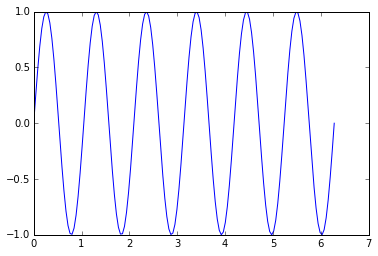

In [12]:
x=linspace(0,2*pi,150)  #150 puntos entre 0 y 2π
y=sin(6*x)
plot(x,y)

In [13]:
#Los dos cuadros anteriores se hicieron para ver cómo debería programarse el integrador
def integrador_euler (funcion,punto_inicial,tiempo):
    dh = 0.1
    solucion=[punto_inicial]
    for i in range(len(tiempo)):
        solucion.append(funcion(solucion[i])*dh+solucion[i])   #Va a agregar f(y_i)*dh+f_i a las soluciones de (t,f(x,y))
        return solucion

 $$f`(x)=lim_{h\to 0} \frac{f(x+h)+f(x)}{h}$$ 
$$f(x+h)=f`(x)h+f(x)$$

La solucion de $y`(x)=ay(x)$ con $y(0)$=1 es $y(x)=e^{ax}$

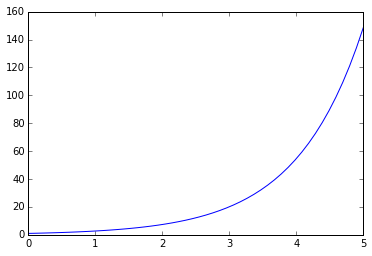

In [14]:
def solucion(x,a):
    return exp(a*x)
x=linspace(0,5)
y=solucion(x,1.)
plot(x,y)

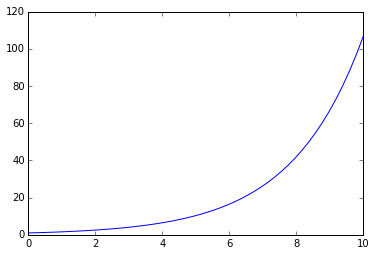

In [15]:
#Se copio de unos cuadros arriba
def ec_diferencial(a,y):
    return a*y

def integrador_euler(funcion,punto_inicial,tiempo):
    dh = 0.1
    solucion=[punto_inicial]
    for i in range(len(tiempo)-1):
        solucion.append(funcion(1,solucion[i])*dh+solucion[i])
    return solucion

tiempo=linspace(0,10)
y_sum=integrador_euler(ec_diferencial,1.,tiempo)
plot(tiempo,y_sum)

In [16]:
def ec_dif(y,t,a):
    return a*y


In [17]:
from scipy.integrate import*


In [22]:
y_odeint=odeint(ec_diferencial(y,1.),[0,1.],tiempo,args=(1.,))  

plot(tiempo,y,tiempo,y_odeint)   #...y,y_euler_05[1],tiem...

error: The function and its Jacobian must be callable functions.

In [85]:
"""
y''+y=0
y(0)=1
y(1)=0
y'(0)=0
y'=v
v'=-y
"""


def ec2(y,t):
    return array([y[1],-y[0]])
def ec3(y,t):
    return array([y[1],-sin(y[0])])

print ec2([1,0],0)

[ 0 -1]


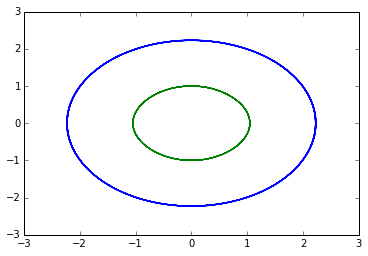

In [86]:
tiempo=linspace(0,20*pi,300)
solucion=odeint(ec2,[2.,1.],tiempo)
solucion2=odeint(ec3,[.9,.5],tiempo)

#print solucion[1]
#print solucion[1][:]
# print solucion[:][:];
#Ahí los diferentes usos de los corchetes

y=[]
y_dot=[]
y2=[]
y2_dot=[]
for i in range(len(solucion)):
    y.append(solucion[i][0]) 
    y_dot.append(solucion[i][1])
    y2.append(solucion2[i][0]) 
    y2_dot.append(solucion2[i][1])
    
plot(y,y_dot,y2,y2_dot)

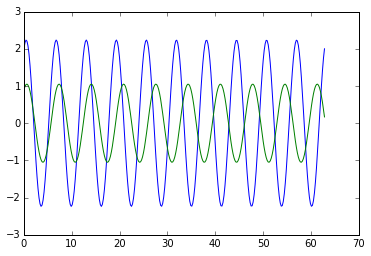

In [96]:
plot(tiempo,y)
plot(tiempo,y2)